<a href="https://colab.research.google.com/github/mtuliocarvalho/Applied-Deep-Learning-with-Keras/blob/master/ClassReceitaExec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Definição do problema

>**1. Contextualização:**

>>Assim como em uma empresa privada, a receita orçamentária da União é classificada com seus respectivos desdobramentos. Cada classificação mostra aspectos importantes tanto da despesa quanto da receita, por exemplo quem é o responsável pelo gasto, qual o seu objetivo ou qual a sua origem. Isso permite que tanto a Receita quanto a Despesa sejam analisadas por diversos ângulos.

>>Uma das classificações usadas pelo governo divide as receitas e despesas em primárias e financeiras. Essa classificação é importante para avaliar a saúde financeira e o e endividamento do governo. 

>>O governo tem duas maneiras de conseguir recursos para custear as despesas públicas: 
>>>**Receitas Primárias:**  são receitas obtidas pela cobrança de tributos como imposto de renda e a taxa de emissão de passaportes ou pelos recursos obtidos por meio de concessões como de estradas, portos e aeroportos. Também está incluído nesse tipo de receita a venda de ativos como as privatizações de empresas estatais e outros itens que compõe o patrimônio público. Nesses casos, o governo não precisa de contrair uma dívida para conseguir essas receitas.

>>>**Receitas Financeiras:** são recursos obtidos exatamente pela contratação de dívidas. Estamos falando aqui de fontes de financiamento, onde o governo toma empréstimos para realizar certos gastos. Esses empréstimos deverão ser pagos no futuro com juros e encargos.

>>A diferença entre receita primária e despesa primária é chamada de resultado primário. Quando as receitas primárias são maiores que as despesas primárias, encontra-se o chamado superávit primário. Quando o contrário acontece, há um déficit primário.


>>>![Receitas Primárias e Financeiras](https://drive.google.com/uc?id=1KjxlBYJqOI-Nn0JdLNLJrAXyIt4YRhPr)

>>Com relação as receitas primárias, é importante entender como as informações são organizadas. De forma geral, elabora-se uma hierarquia na qual os valores são reunidos de acordo com alguma lógica de organização. Nesse sentido, há uma codificação para todos os elementos que compõem o Resultado Primário.

>>Perceba que a receita total é formada por elementos que compõem a sua hierarquia. E esses elementos também são resultado de um agrupamento de outros itens. Essa estrutura vai descendo até chegarmos nas chamadas receitas que não possuem nenhuma aglutinação. Abaixo um exemplo dessa estrutura:

>>>I. Receita Total

>>>>I.1 - Receita Administrada pela RFB

>>>>>I.1.1 Imposto de Importação

>>>>>I.1.2 IPI

>>>>>I.1.2.1 IPI - Fumo

>>>>>I.1.2.2 IPI - Bebidas

>>>>>I.1.2.3 IPI - Automóveis

>>>>>I.1.2.4 IPI - Vinculado a importação

>>Fonte: [Tesouro Nacional Transparente](http://www.tesourotransparente.gov.br/historias/ressignificando-o-resultado-do-tesouro-nacional)


>**2. Problema proposto:**

>>A Secretaria do Tesouro Nacional publica mensalmente um relatório  intitulado Resultado do Tesouro Nacional, onde os valores são organizados segundo a estrutura mostrada no tópico anterior. Tal informação, porém, não está disponível no SIAFI - Sistema Integrado de Administração Financeira. 

>>O [SIGA Brasil](https://www12.senado.leg.br/orcamento/sigabrasil), desenvolvido pela Secretaria Especial de Informática (Prodasen) em parceria com a Consultoria de Orçamentos do Senado Federal, é um Data Warehouse sobre orçamento público, cuja principal fonte de dados é o SIAFI. 

>>Com o objetivo de incluir essa classificação da receita publicada pela Secretaria do Tesouro Nacional no SIGA Brasil, a Consultoria de Orçamentos do Senado Federal, com pleno entendimento das regras de negócio, deriva manualmente, usando planilha Excel, tal classificador, que no presente trabalho será chamado **Classificação Resultado Primário**, a partir dos classificadores Unidade Orçamentária (UO), Fonte de Recursos e Natureza da Receita. O exemplo abaixo mostra algumas receitas com os classificadores Unidade Orçamentária (UO), Fonte de Recursos e Natureza Receita, que serão os atributos previsores e a Classificação Resultado Primário, que será a classe alvo:

>>>![Receitas UFMG 2014](https://drive.google.com/uc?id=1LSvrTGj9qkR8wSXc6bYstkKa3y-yYYBk)

>>É importante ressaltar que a metodologia usada pela Consultoria de Orçamentos para derivar a classificação do resultado primário não implica em regras fixas que possam determinar de forma definitiva as classificações de todas as receitas arrecadadas durante um exercício, dada a imprevisibilidade do processo de arrecadação.

>>Vale destacar também que a Consultoria de Orçamentos do Senado Federal adota uma Classificação do Resultado Primário própria, que se aproxima da classificação adotada pela Secretaria do Tesouro Nacional, mas que apresenta algumas particularidades.

>>Nesse cenário então, desenha-se, de maneira clara, os atributos previsores, a classe alvo e a consequente aplicabilidade de um modelo preditivo, que possa aprender as regras e padrões dessa classificação, gerando resultados com um nível de assertividade tal, que diminua significativamente o trabalho manual.

>>O objetivo desse trabalho é, então, desenvolver um modelo preditivo para classificar, no âmbito do Orçamento Geral de União, os lançamentos de receita quanto ao resultado primário.


>**3. A escolha do modelo**

>>Para a solução do problema descrito nos tópicos anteriores, foi criado um modelo de *Deep Learning*, desenvolvido em Python usando a biblioteca Keras. A decisão sobre qual modelo usar para esse problema específico foi apoiada pelos resultados da ferramenta RapidMiner, que aplica vários modelos para o problema e faz um ranking entre eles. Apesar de o modelo de *Deep Learning* não ter sido o melhor entre os modelos avaliados, o desafio foi, a partir das definições do modelo de Deep Learning do *RapidMiner*, criar um modelo com a biblioteca *Keras* com melhor desempenho do que o alcançado pelo *RapidMiner*, o que de fato aconteceu, como será mostrado na seção de apresentação dos resultados. A figura abaixo mostra a avaliação de vários modelos feita no RapidMiner.

>>>![RapidMiner](https://drive.google.com/uc?id=1SACsaMPhElPUbMUSfPL06ogcHOoFZ0Ui)

>**4. Biblioteca Keras**

>>A biblioteca *Keras* é uma *Application Program Interface* - API de alto nível para *Deep Learning* que permite facilmente construir, treinar, avaliar e executar todos os tipos de redes neurais.

>>Em geral, o uso da biblioteca *Keras* abstrai muito da complexidade matemática envolvida na construção de um modelo de rede neural, direcionando o esforço do projeto para a definição da arquitetura da rede neural. 

>>A estrutura de dados fundamental do *Keras* é o *model*, que é uma forma de organizar as camadas. O tipo mais simples de *model* é o *Sequential*, que pode ser entendido como uma pilha linear de camadas (*layers*).

>>Fonte: [Keras Documentation](https://keras.io/)

>**5. Representação do modelo de redes neurais para o problema proposto**

>>![alt text](https://drive.google.com/uc?id=12G4DI0gMgm9sX5UH_-5Mvd0r5UMJMtzJ)

###2. Coleta de dados

####Importação das bibliotecas e instalação dos pacotes

In [0]:
!pip install plotly --upgrade
!pip install plotly.express
!pip install squarify

In [0]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent Optimizer

from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib
import pickle
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
import matplotlib.style as style
from IPython.display import Image
sb.set(font_scale=1.35, style="ticks") #set styling preferences
%matplotlib inline

#import plotly
import plotly.express as px

####Leitura dos dados de treinamento

In [0]:
# upload dos dadasets do github
!wget 'https://github.com/mtuliocarvalho/Receita-Execucao/raw/master/ReceitaExecucao2010.xls' -O sample_data/ReceitaExecucao2010.xls
!wget 'https://github.com/mtuliocarvalho/Receita-Execucao/raw/master/ReceitaExecucao2011.xls' -O sample_data/ReceitaExecucao2011.xls
!wget 'https://github.com/mtuliocarvalho/Receita-Execucao/raw/master/ReceitaExecucao2012.xls' -O sample_data/ReceitaExecucao2012.xls
!wget 'https://github.com/mtuliocarvalho/Receita-Execucao/raw/master/ReceitaExecucao2013.xls' -O sample_data/ReceitaExecucao2013.xls
!wget 'https://github.com/mtuliocarvalho/Receita-Execucao/raw/master/ReceitaExecucao2014.xls' -O sample_data/ReceitaExecucao2014.xls

In [6]:
def mergedf (df1, df2):
  df = pd.merge(df1, df2, on=['UO','Fonte','NaturezaReceita'], how='left', indicator=True)
  # exclui as linhas do df1 em que a ClassReceitaNome está diferente do df2 para a mesma UO, Fonte e Natureza
  # deve prevalecer a classfificação mais recente
  df = df.drop(df.loc[(df['ClassReceitaNome_x'] != df['ClassReceitaNome_y']) & (df['_merge'] == 'both')].index)
  df.rename(columns = {'Ano_x': 'Ano', 'ClassReceitaCod_x': 'ClassReceitaCod', 'ClassReceitaNome_x': 'ClassReceitaNome',
                       'ReceitaPrevista_x': 'ReceitaPrevista', 'ReceitaArrecadadaLiquida_x': 'ReceitaArrecadadaLiquida'}, inplace=True)
  df = df[['Ano', 'ClassReceitaCod', 'ClassReceitaNome', 'UO', 'Fonte', 
           'NaturezaReceita', 'ReceitaPrevista', 'ReceitaArrecadadaLiquida']]
  return df

# leitura dos datasets
df2010 = pd.read_excel("sample_data/ReceitaExecucao2010.xls")
df2011 = pd.read_excel("sample_data/ReceitaExecucao2011.xls")
df2012 = pd.read_excel("sample_data/ReceitaExecucao2012.xls")
df2013 = pd.read_excel("sample_data/ReceitaExecucao2013.xls")
df2014 = pd.read_excel("sample_data/ReceitaExecucao2014.xls")
frames = [df2010, df2011, df2012, df2013, df2014]

# elimina linhas onde haja rótulos não classificados e onde haja valores nulos
# as linhas não classificadas confundem o modelo, pois podem pertencer a qualquer classe.
for i in range(len(frames)):
  frames[i] = frames[i][frames[i]['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()

# exclui as linhas do df2010 em que a ClassReceitaNome está diferente em df2011, df2012, df2013 ou df2014 
# para a mesma Fonte, UO e Natureza e assim sucessivamente
# deve prevalecer a classfificação mais recente
for i in range(len(frames)-1):
  for j in range(len(frames)):
    if j>i:
      frames[i] = mergedf(frames[i], frames[j])

# definição do dataset de treinamento - df2010, df2011, df2012, df2013
df_train = pd.concat([frames[i] for i in range(len(frames)-1)], ignore_index=True)

# muda para categóricos os atributos preditores
df_train['UO'] = df_train['UO'].astype(str)
df_train['Fonte'] = df_train['Fonte'].astype(str)
df_train['NaturezaReceita'] = df_train['NaturezaReceita'].astype(str)

# elimina linhas duplicadas
df_train = df_train.drop_duplicates(['UO', 'Fonte', 'NaturezaReceita', 'ClassReceitaNome'])
df_train.shape

(9091, 8)

In [0]:
# salvar o datafile de treinamento para uso no Tableau e para o RapidMiner
from pandas import ExcelWriter
writer = ExcelWriter('ReceitaExecucao_2010_a_2013.xls')
df_train.reset_index()
df_train.to_excel(writer,'Sheet1',index=False)
writer.save()

####Leitura dos dados de teste (validação)

In [0]:
# a base de teste será o exercício de 2014
df_test = df2014
df_test = df_test.dropna()

df_test['UO'] = df_test['UO'].astype(str)
df_test['Fonte'] = df_test['Fonte'].astype(str)
df_test['NaturezaReceita'] = df_test['NaturezaReceita'].astype(str)
df_test = df_test[df_test.loc[:,'ClassReceitaNome'] != 'NÃO INFORMADO']

X_test = df_test[['UO','Fonte','NaturezaReceita']].values
Y_test = df_test['ClassReceitaNome'].values

# registros não existentes na base de treinamento, usados para validação no modelo
df_valid = pd.merge(df_test, df_train, on=['UO', 'Fonte','NaturezaReceita'], how='left', indicator=True)
df_valid = df_valid[df_valid['_merge'] == 'left_only']

df_valid.rename(columns = {'ClassReceitaNome_x': 'ClassReceitaNome'}, inplace=True)

X_valid = df_valid[['UO','Fonte','NaturezaReceita']].values
Y_valid = df_valid['ClassReceitaNome'].values

###3. Processamento/Tratamento de Dados

In [0]:
# transforma os atributos previsores (UO, Fonte e Natureza) e os preditos em matriz
X_train = df_train[['UO','Fonte','NaturezaReceita']].values

# transforma o atributo a classe alvo em vetor
Y_train = df_train['ClassReceitaNome'].values

# númerode classes no dataset de treinamento
np.unique(Y_train).shape

# Criação do objeto OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')

# Treinamento
# O fit deve ser feito somente em um dataset para compatibilizar o nr. de colunas dos datasets de treinamento e teste
enc.fit(X_train)
X_train_ohe = enc.transform(X_train).toarray()

# Pickle the encoder for later use
with open('sample_data/ohe', 'wb') as f:
    pickle.dump(enc, f)

# Inputs teste e validação
X_test_ohe = enc.transform(X_test).toarray()
X_valid_ohe = enc.transform(X_valid).toarray()

# Outputs teste e treinamento
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_le = le.fit(Y_train)
Y_train_le = le.transform(Y_train)
Y_test_le = le.transform(Y_test)
Y_valid_le = le.transform(Y_valid)

# Pickle the encoder for later use
with open('sample_data/label_encoder', 'wb') as f:
    pickle.dump(le, f)

X_cols = X_train_ohe.shape[1]
Y_cols = len(np.unique(Y_train_le))

###4. Análise e Exploração dos Dados

>[Análise exploratória do dados - Tableau Public](https://public.tableau.com/profile/marco.t.lio#!/vizhome/Livro1_15662412203670/DistribuiodeClassesdabasedetreinamento-Barras)

####Fronteiras de Decisão

>Fronteiras de Decisão - 3D scatter plot

In [9]:
# Fronteiras de Decisão - 3D scatter plot
# Clique duplo no rótulo da classe para selecionar a classe no gráfico
fig = px.scatter_3d(df_train, x='Fonte', y='UO', z='NaturezaReceita',
              color='ClassReceitaNome',width=1100, height=660)
fig.for_each_trace(lambda trace: trace.update(name=trace.name.replace("ClassReceitaNome=", "")))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),showlegend=True)
fig.show()

####Contagem distinta dos atributos previsores por classe

>Contagem distinta dos atributos previsores por classe - 3D scatter plot

In [22]:
# Contagem distinta dos atributos previsores por classe - 3D scatter plot
# dataframe com a contagem distinta dos atributos previsores por classe
df_plt = df_train.groupby(['ClassReceitaNome'])['Fonte'].nunique().reset_index(name="Fonte")
df_plt['UO'] = df_train.groupby(['ClassReceitaNome'])['UO'].nunique().reset_index(name="UO").iloc[:,1]
df_plt['NaturezaReceita'] = df_train.groupby(['ClassReceitaNome'])['NaturezaReceita'].nunique().reset_index(name="NaturezaReceita").iloc[:,1]
df_plt['Total'] = df_plt.Fonte + df_plt.UO + df_plt.NaturezaReceita
#df_plt.set_index('ClassReceitaNome', inplace=True)

# Contagem distinta dos atributos previsores por classe - 3D scatter plot
fig = px.scatter_3d(df_plt, x='Fonte', y='UO', z='NaturezaReceita',
              color='ClassReceitaNome',width=1100, height=660)
fig.for_each_trace(lambda trace: trace.update(name=trace.name.replace("ClassReceitaNome=", "")))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),showlegend=True)
fig.show()

In [11]:
# Contagem distinta dos atributos previsores por classe - stacked bars
import plotly.graph_objects as go

#df_plt.reset_index(inplace=True)
df_plt.sort_values(by=['Total'], inplace=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=df_plt.ClassReceitaNome.values,
    x=df_plt.UO.values,
    name='Unidade Orçamentária',
    orientation='h',
    marker=dict(
        color='rgba(78, 121, 167, 0.6)',
        line=dict(color='rgba(78, 121, 167, 1.0)', width=1)
    )
))
fig.add_trace(go.Bar(
    y=df_plt.ClassReceitaNome.values,
    x=df_plt.NaturezaReceita.values,
    name='Natureza Receita',
    orientation='h',
    marker=dict(
        color='rgba(255, 87, 89, 0.6)',
        line=dict(color='rgba(225, 87, 89, 1.0)', width=1)
    )
))
fig.add_trace(go.Bar(
    y=df_plt.ClassReceitaNome.values,
    x=df_plt.Fonte.values,
    name='Fonte',
    orientation='h',
    marker=dict(
        color='rgba(237, 201, 72, 0.6)',
        line=dict(color='rgba(237, 201, 72, 1.0)', width=1)
    )
))

fig.update_layout(barmode='stack',height=800, title='Importância dos atributos preditores')
fig.update_xaxes(tickfont=dict(family='Rockwell', size=14))
fig.update_yaxes(tickfont=dict(family='Times', size=9))
fig.show()

In [0]:
df_plt.head()

,ClassReceitaNome,Fonte,UO,NaturezaReceita,Total
25,IR - PESSOA FÍSICA,5,8,8,21
35,OUTRAS CONTRIBUIÇÕES SOCIAIS,4,9,8,21
3,CONTRIBUIÇÃO PARA O PIS/PASEP,4,4,15,23
5,CONTRIBUIÇÃO PLANO DE SEGURIDADE DO SERVIDOR -...,6,7,10,23
26,IR - PESSOA JURÍDICA,5,8,12,25


####Distribuição por classes - base de treinamento

In [0]:
# função de mapa de árvore - base de treinamento e teste
def plot_treemap (df, titulo, total, font_size):
  cmap = matplotlib.cm.Reds
  minimo = min(df.Total)
  maximo = max(df.Total)
  norm = matplotlib.colors.Normalize(vmin=minimo, vmax=maximo)
  colors = [cmap(norm(value)) for value in df.Total]

  #Remove the axis
  plt.rc('font', size=font_size)
  fig = plt.figure(figsize=(16, 9))
  ax = plt.axis('off')

  #Plot
  squarify.plot(
      sizes=df.Total,
      alpha=.8, color=colors,
      label=df.apply(lambda x: x.ClassReceitaNome + '\n' + str(x.Total) if x.Total > total else '', axis=1),)
  ax = plt.axis('off')
  ax = plt.title(titulo)

In [0]:
# tamanho da base de treinamento
df_train.shape

(9091, 8)

In [0]:
# número de Classes base de treinamento
df_train.loc[:,'ClassReceitaNome'].unique().shape

(49,)

In [13]:
# totais por classe base de treinamento
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.3f}'.format(x)
df_train_group = pd.DataFrame(df_train.groupby('ClassReceitaNome').size())
df_train_group.reset_index(level=0, inplace=True)
isinstance(df_train_group, pd.DataFrame)
df_train_group.rename(columns = {df_train_group.columns[1]: 'TotalClasse'}, inplace=True)
df_train_group['PercentualClasse'] = (df_train_group.TotalClasse/df_train.shape[0])
df_train_group.sort_values(by=['TotalClasse'], ascending=False, inplace=True)
df_train_group.head()

,ClassReceitaNome,TotalClasse,PercentualClasse
41,RECEITA PRÓPRIA,3959,0.435
36,OUTRAS RECEITAS NÃO ADMINISTRADAS,1520,0.167
40,RECEITA FINANCEIRA,492,0.054
33,OUTRAS ADMINISTRADAS SRF - DEMAIS,449,0.049
44,RENDAS DA SPU,387,0.043


In [14]:
# distribuição Classes base de treinamento
fig = px.bar(df_train_group, x='ClassReceitaNome', y='PercentualClasse')
fig.update_layout(height=700, title='Distribuição de Classes na base de treinamento - Receita Execução 2010 a 2013')
fig.update_xaxes(tickangle=-45, tickfont=dict(family='Rockwell', size=9), title='Classes')
fig.update_yaxes(tickfont=dict(family='Times', size=9), title='Percentual por Classe',tickformat= ',.2%')
fig.show()

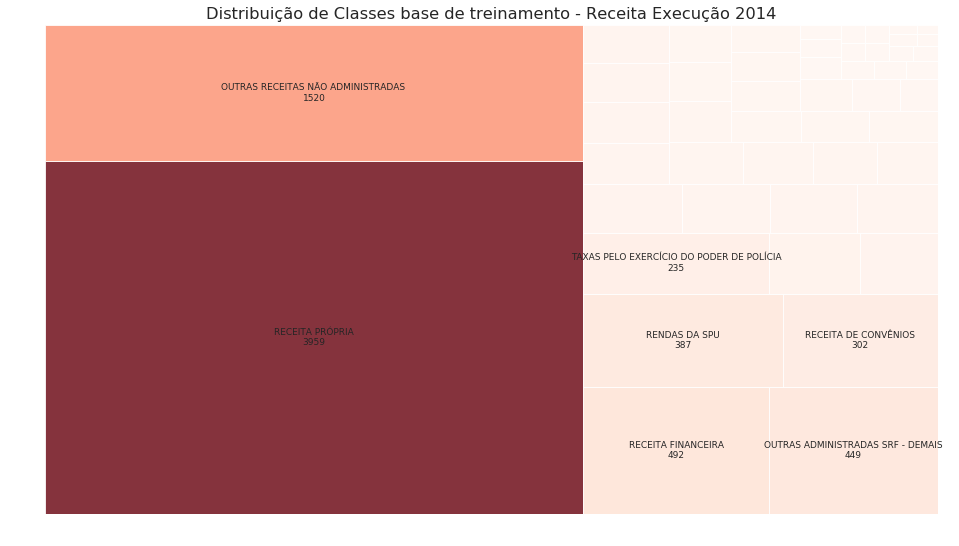

In [17]:
# base de treinamento
# Group and count
import squarify
df = df_train.groupby(df_train.columns.values[2]).size().reset_index()
df.rename(columns = {df.columns[0]: 'ClassReceitaNome', df.columns[1]: 'Total'}, inplace =True)
df = df.sort_values("Total", ascending=False)
# create a color palette, mapped to these values
plot_treemap(df, 'Distribuição de Classes base de treinamento - Receita Execução 2014', 120, 9)

####Distribuição por classes - base de teste

In [18]:
# tamanho da base de validação (teste)
print('Quantidade de registros da base de teste:')
print(df_test.shape[0])

# número de Classes base de validação
print('Número de Classes base de validação:')
print(df_test.loc[:,'ClassReceitaNome'].unique().shape[0])

Quantidade de registros da base de teste:
6387
Número de Classes base de validação:
49


In [19]:
# dataframe total por classe base de teste
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.3f}'.format(x)
df_test_group = pd.DataFrame(df_test.groupby('ClassReceitaNome').size())
df_test_group.reset_index(level=0, inplace=True)
isinstance(df_test_group, pd.DataFrame)
df_test_group.rename(columns = {df_test_group.columns[1]: 'TotalClasse'}, inplace=True)
df_test_group['PercentualClasse'] = (df_test_group.TotalClasse/df_test.shape[0])
df_test_group.sort_values(by=['TotalClasse'], ascending=False, inplace=True)

# distribuição Classes base de teste
fig = px.bar(df_test_group, x='ClassReceitaNome', y='PercentualClasse')
fig.update_layout(height=700, title='Distribuição de Classes na base de teste - Receita Execução 2014')
fig.update_xaxes(tickangle=-45, tickfont=dict(family='Rockwell', size=9), title='Classes')
fig.update_yaxes(tickfont=dict(family='Times', size=9), title='Percentual por Classe',tickformat= ',.2%')
fig.show()

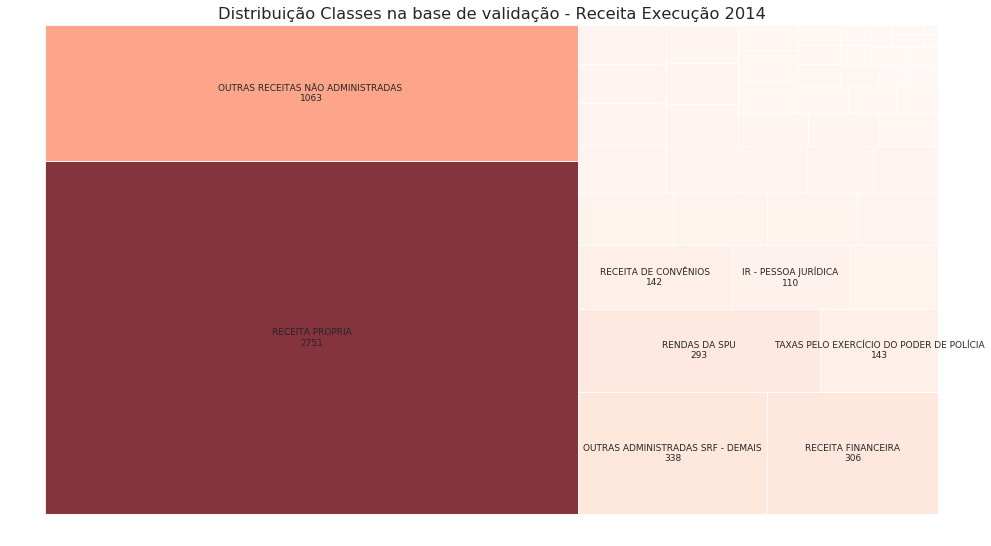

In [20]:
# Distribuição de Classes na base de teste - mapa de árvore
df = df_test.groupby(["ClassReceitaNome"]).size().reset_index()
df.rename(columns = {df.columns[0]: 'ClassReceitaNome', df.columns[1]: 'Total'}, inplace =True)
df = df.sort_values("Total", ascending=False)
plot_treemap(df, 'Distribuição Classes na base de validação - Receita Execução 2014', 100, 9)

###5. Criação do Modelo de Deep Learning

####Conceitos

>**Indrodução**
>> A construção de redes neurais artificiais envolve a criação de camadas de nós ou neurônios, onde cada nó é um tipo de tensor de pesos aprendidos no processo de treinamento. 

>>O poder das redes neurais está na sua capacidade de aprender os padrões e os relacionamentos nos dados de treinamento, relacionando da melhor forma possível a entrada (inputs) da rede com a saída (classe alvo) que desejamos prever.

>>De uma forma geral, podemos dizer que as redes neurais artificiais são modelos muito flexíveis e poderosos, que podem aproximar literalmente qualquer função complexa.

>**Funcionamento**
>>Primeiro, para cada instância de treinamento, o algoritmo *backpropagation* faz uma previsão (forward pass) a partir dos pesos iniciais atribuídos aleatoriamente, mede o erro e depois caminha por cada camada em sentido contrário para medir a contribuição do erro de cada conexão (reverse pass) e, finalmente, ajusta ligeiramente os pesos das conexões para reduzir o erro (*Gradient Descent step*). 

####Definição dos hiperparâmetros do modelo

>**Capacidade da Rede Neural:**

>Um modelo com pouca capacidade pode não ser capaz de aprender suficientemente as relações e os padrões do conjunto de dados de treinamento (*underfit*). Por outro lado, um modelo com muita capacidade pode memorizar o conjunto de dados de treinamento e, consequentemente, não generalizar bem quando exposto a novos dados (*overfit*).
Algoritmos de Machine Learning geralmente terão seu melhor desempenho, quando sua capacidade está apropriada para a complexidade real do problema e para a quantidade de dados de treinamento disponível.
>>Número de camadas ocultas: 2

>>Número de nós (neurônios) nas camadas ocultas: 128


>**Funções de ativação:**

>>>O somatório dos valores de entrada (x$_{1}$, x$_{2}$, ..., x$_{n}$) multiplicados pela matriz de pesos (w$_{1}$, w$_{2}$, ..., w$_{n}$) e, opcionalmente, somado a um bias *b* transformam o sinal de entrada linearmente. A função de ativação, por outro lado, transforma o sinal de maneira não linear, permitindo que a rede neural aprenda transformações mais complexas (não lineares) entre a entrada e a saída.

>>>![Neuron Diagram](https://drive.google.com/uc?id=1DyrPy_FTbsKkAu76AWotOV4cjAMOCyKs)

>>**Nas camadas escondidas:**
>>>ReLU (Rectified Linear Units): $f(x)=x^+= max(0,x)$

>>>Nas redes neurais modernas, a recomendação padrão é usar nas camadas intermediárias a ***rectified linear unit***, ou ***ReLU***. Embora a função ***ReLU*** se aproxime de uma função linear, por ser composta por duas partes lineares, a aplicação da função ***ReLU*** à saída de uma transformação linear produz uma transformação não linear. Exatamente por ser não linear, a função ***ReLU*** é diferenciável, permitindo a retro propagação do erro para atualização dos pesos durante fase de treinamento.
A função ReLU tem a vantagem de ser computacionalmente eficiente, tornando mais rápida a convergência do modelo.

>>**Na camada de saída:**
>>>Softmax: $S(y_{i})=\frac{e^{yi} } { \sum_{j}e^{yj} }$

>>>A última camada do modelo de rede neural desenvolvido usa a função de ativação ***Softmax***. Normalmente, a função ***Softmax*** é usada na camada de saída de redes neurais que precisam classificar as entradas em múltiplas categorias. Ela permite que, para cada instância de entrada, a saída seja interpretada como uma distribui-ção de probabilidade para as 49 classes de saída. A figura a seguir mostra um exemplo da aplicação da função de ativação ***softmax*** em um problema com três classes alvo.


>>>![Softmax](https://drive.google.com/uc?id=14R00EXYG4lvUVh5zdhR6n_3VbkLoNcRT)

>>>*Logits* são os valores de previsão brutos gerados pela última camada da re-de neural, antes da aplicação da função de ativação.

>**Otimização:**
>>Quando o modelo está aprendendo os parâmetros ideais (pesos e *bias*), é necessário definir uma função para medir o erro (*loss function*). Essa função fornece uma medida da diferença entre o valor das saídas previstas pela rede neural e o valor real das saídas. O processo de otimização consiste na atualização dos parâmetros da rede neural até que a diferença entre a saída prevista e a real atinja o seu valor mínimo.


>>![Loss Function](https://drive.google.com/uc?id=1xf8qEI8B-WCKZ8cqhIndYPyymcj8TR_O)

>>Um algoritmo de otimização muito comum usado para aprender os parâmetros ideais nos modelos de *Deep Learning* é a descida do gradiente (*gradient descent*). O algoritmo *gradient descent* padrão usa todo o conjunto de dados no aprendizado dos parâmetros.

>>O algoritmo *stochastic gradient descent* (SGD) usa apenas um subconjunto (*batch*) dos dados durante o aprendizado dos parâmetros e, por isso, seu processo de aprendizado é mais rápido. Os algoritmos SGD mantêm uma taxa de aprendizado (*learning rate*) única para todas as atualizações de peso durante o treinamento.

>>O algoritmo de otimização ***Adam*** aprimora esse processo usando a taxa de aprendizado como uma média ponderada dos gradientes e uma média ponderada dos quadrados dos gradientes para atualizar os parâmetros a cada iteração. Por esse motivo o ***Adam*** é conhecido como um algoritmo de taxa de aprendizado adaptável.

>>A escolha do algoritmo de otimização para o modelo de *Deep Learning* desse projeto foi o ***Adam***, que, nesse caso, superou os algoritmos SGD no treinamento do modelo de *Deep Learning*.

>**Tamanho do lote - *batch size*, número de épocas – *epochs* e *Early Stopping***

>>O hiperparâmetro *epochs* define o número de vezes que o algoritmo de otimização deve passar por todo o conjunto de dados de treinamento antes de parar. Por exemplo, se tivermos um conjunto de dados de tamanho quatrocentos (n = 400), escolhermos um *batch size* de tamanho cinco (*batch_size* = 5) e um número de *epochs* de vinte (*epochs* = 20), então o otimizador fará oitenta iterações (400÷5) para passar por todo o conjunto de dados. Como ele deve percorrer todo o conjunto de dados vinte vezes (*epochs* = 20), conforme definido pelo hiperparâmetro *epochs*, ele fará mil e seiscentas (80x20) iterações no total.

>>Treinar um modelo de *Deep Learning* por poucas épocas, pode implicar em um modelo com *underfitting* nos datasets de treinamento e teste. Por outro lado, um treinamento por muitas épocas pode implicar em um modelo com *overfitting* no dataset de treinamento e, consequentemente, um desempenho ruim na base de teste. Monitorando o processo de treinamento é possível treinar o modelo suficientemente para que aprenda os padrões e relacionamentos da base de treinamento, interrompendo o treinamento antes que o modelo se torne super ajustado à base de treinamento. Essa estratégia é conhecida como Early Stopping e provavelmente é a forma de regularização mais usada em *Deep Learning*. Sua popularidade se deve tanto à sua eficácia quanto à sua simplicidade.

>>No keras, o uso do *Early Stopping* força a interrupção do treinamento do modelo quando não há uma melhora após um número de épocas especificado em uma métrica definida, como por exemplo, a taxa de erro na base de teste.

>>Na rede neural desenvolvida nesse projeto, os hiperparâmetros *batch size* e *epochs* foram definidos experimentalmente, chegando nos seguintes valores:
>>>*batch size*: quinhentos e doze (512);

>>>*epochs*: cinquenta (500), interrompendo após cem (100) épocas sem melhora na *val_loss*. A *loss function* *val_loss* define a perda de teste para uma época e é calculado pela rede neural no final de cada época.

>***Cross Validation***

>> O *k-fold* *Cross Validation* é uma técnica muito usada para avaliação de modelos de *machine learning*. Essa técnica permite testar o modelo em dados não vistos, retendo uma parte dos dados para teste no final. O método divide a base de treinamento em *k* subconjuntos. A cada iteração, ocorre o ajuste (*fit*) e a avaliação (*evaluate*) do modelo usando *k-1* subconjuntos como treinamento e o subconjunto restante como teste. O *score* de validação final é a média dos scores de cada iteração.

>>![k-Fokd Cross Validation](https://drive.google.com/uc?id=1IXa-7Um_eEonW7IfZjxEyZKtU2fwtIZ1)

#####Gráfico das funções de ativação *ReLU* e *Softmax*

In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def relu(x):
    return np.maximum(0, x)

def softmax(inputs):
    return np.exp(inputs) / float(sum(np.exp(inputs)))
 
fig = make_subplots(rows=1, cols=2, subplot_titles=("ReLU", "SoftMax"))
x = np.arange(-5, 5, 0.01)
y = relu(x)
fig.add_trace(
    go.Scatter(x=x, y=y),
    row=1, col=1)

x = np.arange(1,21,1)
y = softmax(x)
fig.add_trace(
    go.Scatter(x=x, y=y),
    row=1, col=2)

fig.update_layout(height=400, width=700, title_text="Funçoes de ativação")
fig.update_layout(showlegend=False)
fig.show()

>Salvar o modelo em um arquivo para uso em aplicações de predição

In [0]:
from keras.models import load_model
model.save('Receita_model.h5')  # creates a HDF5 file 'my_model.h5'

del model  # deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('Receita_model.h5')

####Criação do modelo - manual KFold

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

def create_model():
  # create model
  model = Sequential()
  model.add(Dense(250, activation='relu', input_shape = (X_cols,)))
  model.add(Dense(250, activation='relu'))
  #model.add(Dense(128, activation='relu'))
  #model.add(Dense(128, activation='relu'))
  model.add(Dense(Y_cols, activation='softmax'))
  # Compile model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

seed = 7
np.random.seed(seed)
epochs=1000
patience=30
batch_size=512

# Para usar val_loss, o parâmetro validation_data deve estar presente no model.fit
# No Keras, o loss é a média das perdas em cada lote de dados de treinamento. Como o modelo está mudando durante o treinamento, 
# a perda nos primeiros lotes de uma época é geralmente maior do que nos últimos lotes. Por outro lado, o val_loss define a perda de teste 
# para uma época e é calculado usando o modelo no final da época, resultando em uma perda menor.
callbacks = [EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
             ModelCheckpoint('receita_model.h5', monitor='val_loss', save_best_only=True, verbose=0)]

kfold = KFold(n_splits=10, shuffle=True, random_state=None)
cvscores = []
for train, test in kfold.split(X_train_ohe, Y_train_le):
  # create and compile model
	model = create_model()
	# fit the model
	model_history = model.fit(X_train_ohe[train], Y_train_le[train],
                            epochs=epochs, batch_size=batch_size, verbose=0, callbacks=callbacks,
                            validation_data=(X_test_ohe, Y_test_le))
	# evaluate the model
	scores = model.evaluate(X_train_ohe[test], Y_train_le[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


acc: 99.67%
acc: 99.12%
acc: 99.78%
acc: 99.45%
acc: 99.45%
acc: 99.45%
acc: 99.34%
acc: 99.67%
acc: 99.56%
acc: 99.78%
99.53% (+/- 0.20%)


>Plotting the training and validation loss

In [0]:
!pip install scikit-plot

Train: 1.000, Test: 0.999
Train: 0.002, Test: 0.004
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


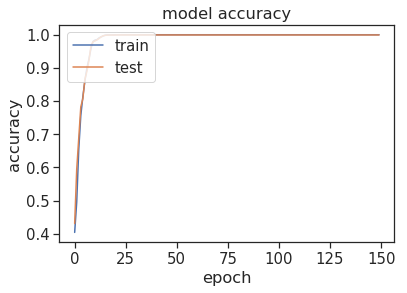

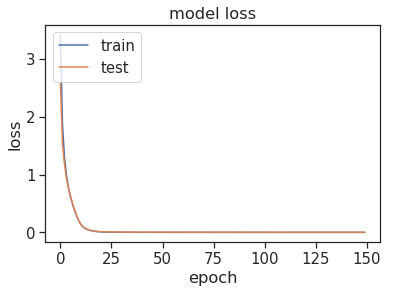

In [0]:
# evaluate the model
train_loss , train_acc = model.evaluate(X_train_ohe, Y_train_le, verbose=0)
test_loss, test_acc = model.evaluate(X_test_ohe, Y_test_le, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####Predição

>**P(Y | X) → representa uma distribuição de probabilidades sobre todos os valores individuais na matriz Y, dada a matriz X**

>**Função predição**

In [0]:
def predicao(df_pred, wExcel = False):

  # X -> atributos previsores
  X_pred = df_pred[['UO','Fonte','NaturezaReceita']].values
  
  # Codificação de X
  X_pred_ohe = enc.transform(X_pred).toarray()
  
  # Predição
  Y_pred_le = model.predict(X_pred_ohe)
  
  # Criação da coluna predita no dataframe
  df_pred['ClassReceitaNome_Predita'] = le.inverse_transform(np.argmax(Y_pred_le, axis=1))
  #df_pred['ClassReceitaNome_Predita_2'] = le.inverse_transform(np.argmax(Y_pred_le, axis=1))
  #df_pred['ClassReceitaNome_Predita'] = le.inverse_transform(Y_pred_le)
  
  if wExcel:
    from pandas import ExcelWriter
    writer = ExcelWriter('ReceitaExecucaoPred2014.xls')
    df_pred.to_excel(writer,'Sheet1',index=False)
    writer.save()

  return df_pred

>**Receitas da base de validação - 2014**

In [0]:
df_pred = df_test.copy()
df_result = predicao(df_pred, True).copy()
order = [8,2,3,4,5]
df_result = df_result[df_result.columns[order]]
df_result.rename(columns = {'ClassReceitaNome': 'ClassReceitaNome_Real'}, inplace=True)
df_result.head()

,ClassReceitaNome_Predita,ClassReceitaNome_Real,UO,Fonte,NaturezaReceita
0,IMPOSTO DE IMPORTAÇÃO,IMPOSTO DE IMPORTAÇÃO,25103,100,11110101
1,IMPOSTO DE IMPORTAÇÃO,IMPOSTO DE IMPORTAÇÃO,25103,100,11110102
2,IMPOSTO DE IMPORTAÇÃO,IMPOSTO DE IMPORTAÇÃO,25103,100,19110101
3,IMPOSTO DE IMPORTAÇÃO,IMPOSTO DE IMPORTAÇÃO,25103,100,19110102
4,IMPOSTO DE IMPORTAÇÃO,IMPOSTO DE IMPORTAÇÃO,25103,100,19130101


>**Linhas onde o real está diferente do predito**

In [0]:
# linhas onde o real está diferente do predito
df_result[df_result.iloc[:,0] != df_result.iloc[:,1]]

,ClassReceitaNome_Predita,ClassReceitaNome_Real,UO,Fonte,NaturezaReceita
492,OUTRAS RECEITAS NÃO ADMINISTRADAS,IRRF SEM ABERTURA,25103,101,19229900
1562,ARRECADAÇÃO LÍQUIDA DO INSS,TAXAS PELO EXERCÍCIO DO PODER DE POLÍCIA,33904,154,19195000
1888,ARRECADAÇÃO LÍQUIDA DO INSS,RENDAS DA SPU,33904,154,19189900
3052,RECEITA FINANCEIRA,OUTRAS RECEITAS NÃO ADMINISTRADAS,52931,280,25900000


>**Predição com uma entrada individual de UO, Fonte e Natureza da Receita**

In [0]:
X_test_usr = [['99999','150','19229999']]
X_test_usr_ohe = enc.transform(X_test_usr).toarray()
Y_pred_usr = model.predict(X_test_usr_ohe)
# modelo sem wrap scikit
le.inverse_transform(np.argmax(Y_pred_usr, axis=1))
# modelo com wrap scikit
#le.inverse_transform(Y_pred_usr)
#df_train.loc[(df_train['UO'] == '74915') & (df_train['Fonte'] == '101') & (df_train['NaturezaReceita'] == '11130214')]

array(['RECEITA PRÓPRIA'], dtype=object)

###6. Apresentação dos Resultados

>**Acurácia do modelo para registros não vistos na base de treinamento**

In [0]:
# registros não vistos na base de treinamento
df_unseen = pd.merge(df_pred, df_train, on=['UO', 'Fonte','NaturezaReceita'], how='left', indicator=True)
df_unseen = df_unseen[df_unseen['_merge'] == 'left_only']

df_unseen.rename(columns = {'ClassReceitaNome_x': 'ClassReceitaNome_Real'}, inplace=True)
df_unseen[['UO', 'Fonte','NaturezaReceita','ClassReceitaNome_Real', 'ClassReceitaNome_Predita']].head()

# acurácia das linhas não vistas na base de treinamento
print(df_unseen[(df_unseen.loc[:,'ClassReceitaNome_Predita'] == df_unseen.loc[:,'ClassReceitaNome_Real'])].shape[0]/df_unseen.shape[0])

0.9952153110047847


####Matriz de Confusão

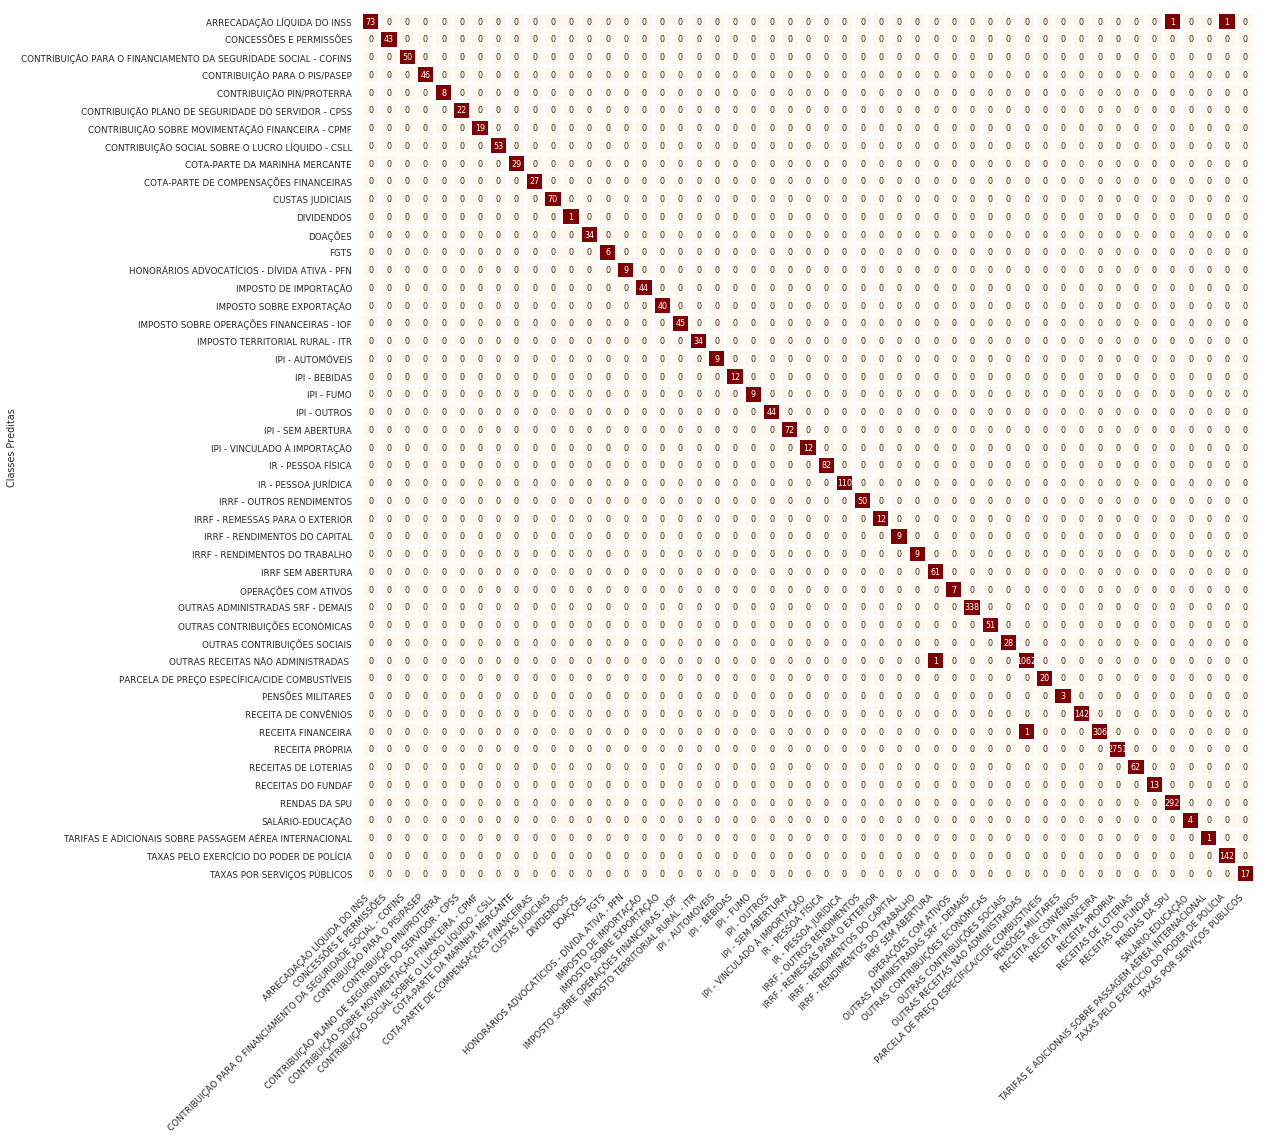

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.multiclass import unique_labels

#Criação da matriz de confusão
#cm = confusion_matrix(Y_test_le, np.argmax(Y_pred_le, axis=1))
cm = confusion_matrix(df_result.iloc[:,0], df_result.iloc[:,1])

plt.figure(figsize = (16,16))
yticklabels = le.inverse_transform(np.unique(Y_test_le))
xticklabels = le.inverse_transform(np.unique(Y_test_le))
target_names = np.unique(le.inverse_transform(np.unique(Y_test_le)))
tick_marks = np.arange(len(target_names)) 

sb.set(font_scale=.8) #for label size
g = sb.heatmap(cm, cbar=False, annot=True, cmap='OrRd', annot_kws={"size": 8}, fmt='g',
    xticklabels=xticklabels, yticklabels=xticklabels, robust=True, linewidths=2)

g.set_xticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')
g.set_ylabel('Classes Reais')
g.set_ylabel('Classes Preditas')
plt.show()

In [0]:
#Transformando a matriz de confusão em um dataframe
df_cm = pd.DataFrame(cm)#.transpose()
df_cm.columns = le.inverse_transform(np.unique(Y_test_le))
df_cm.set_index(le.inverse_transform(np.unique(Y_test_le)), inplace=True)

#Formating Confusion Matrix as HeatMap
cm_sb = sb.set(font_scale=1) #for label size
cm_sb = sb.light_palette("blue", as_cmap=True)
plt_cm = df_cm.style.background_gradient(cmap=cm_sb)
plt_cm

#Para gravar a matriz de confusão no Excel
from pandas import ExcelWriter
writer = ExcelWriter('cm.xlsx')
plt_cm.to_excel(writer,'Sheet1',index=True)
writer.save()

In [0]:
#Elementos da diagonal principal
pd.Series(np.diag(df_cm), index=[df_cm.index, df_cm.columns])

####Classification Report

In [0]:
from sklearn.metrics import accuracy_score, classification_report
#real = le.inverse_transform(Y_test_le)
#pred = le.inverse_transform(np.argmax(Y_pred_le, axis=1))
print(classification_report(df_result.loc[:,'ClassReceitaNome_Real'], df_result.loc[:,'ClassReceitaNome_Predita'], digits=3))

                                                                 precision    recall  f1-score   support

                                    ARRECADAÇÃO LÍQUIDA DO INSS      0.973     1.000     0.986        73
                                        CONCESSÕES E PERMISSÕES      1.000     1.000     1.000        43
CONTRIBUIÇÃO PARA O FINANCIAMENTO DA SEGURIDADE SOCIAL - COFINS      1.000     1.000     1.000        50
                                  CONTRIBUIÇÃO PARA O PIS/PASEP      1.000     1.000     1.000        46
                                      CONTRIBUIÇÃO PIN/PROTERRA      1.000     1.000     1.000         8
            CONTRIBUIÇÃO PLANO DE SEGURIDADE DO SERVIDOR - CPSS      1.000     1.000     1.000        22
              CONTRIBUIÇÃO SOBRE MOVIMENTAÇÃO FINANCEIRA - CPMF      1.000     1.000     1.000        19
               CONTRIBUIÇÃO SOCIAL SOBRE O LUCRO LÍQUIDO - CSLL      1.000     1.000     1.000        53
                                 COTA-PARTE DA MARINHA

###Extras

####Entendendo as redes neurais artificiais

>[Neural Network decision boundaries in action](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.49521&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

>**Overfitting e underfitting:** 
>>Em geral, se um modelo não for flexível o suficiente para aprender as relações e padrões em um conjunto de dados, haverá um alto erro de treinamento. Podemos dizer que esse é um modelo com alto bias (underfitting). 

>>![Decision boundaries - overfitting x underfitting](https://sigmoidal.io/wp-content/uploads/2017/11/overfitting.jpg)

####Experimentos

In [0]:
def softmax(inputs):
    """
    Calculate the softmax for the give inputs (array)
    :param inputs:
    :return:
    """
    return np.exp(inputs) / float(sum(np.exp(inputs)))


softmax_inputs = [2, 3, 5, 6]
print("Softmax Function Output :: {}".format(softmax(softmax_inputs)))

Softmax Function Output :: [0.01275478 0.03467109 0.25618664 0.69638749]


In [0]:
np.unique(Y_train_le)
df_train[df_train.columns[3:4]].values

In [0]:
df_train.head()

,Ano,ClassReceitaCod,ClassReceitaNome,UO,Fonte,NaturezaReceita,ReceitaPrevista,ReceitaArrecadadaLiquida
0,2010,1.01.01,IMPOSTO DE IMPORTAÇÃO,25103,100,11110101,0,"17,438,468,534.17"
1,2010,1.01.01,IMPOSTO DE IMPORTAÇÃO,25103,100,11110102,0,"1,093,991.32"
2,2010,1.01.01,IMPOSTO DE IMPORTAÇÃO,25103,100,19110101,0,"8,629,608.45"
3,2010,1.01.01,IMPOSTO DE IMPORTAÇÃO,25103,100,19110102,0,"591,906.20"
4,2010,1.01.01,IMPOSTO DE IMPORTAÇÃO,25103,100,19130101,0,"378,633.01"


In [0]:
!pip install pandasql

In [0]:
import pandasql as ps
q2 = """select distinct Fonte 
        from df_train
        where ClassReceitaNome = 'RECEITA PRÓPRIA'"""

print(ps.sqldf(q2, locals()))

In [0]:
#df_train.groupby('ClassReceitaNome').agg({'UO': 'sum', 'UO': 'nunique'}).loc[:,'UO']
#df_train.groupby(by='ClassReceitaNome', as_index=False).agg({'UO': pd.Series.nunique}).loc[:,'UO']
#df_train.groupby(by='ClassReceitaNome', as_index=False).agg({'Fonte': pd.Series.nunique}).loc[:,'Fonte']

#	74915	101	11130214 IPI - BEBIDAS	| IR - PESSOA JURÍDICA	no	IR - PESSOA FÍSICA	
df_train.loc[(df_train['UO'] == '74915') & (df_train['Fonte'] == '101')].\
groupby(['ClassReceitaNome']).agg(['count'])
#df_train.loc[(df_train['NaturezaReceita'] == '72100411')]

In [0]:
df_train.loc[(df_train['UO'] == '74204') & (df_train['Fonte'] == '246')]
#df_train.shape

In [0]:
#list comprehension
[[print(frames[i], frames[j]) for j in range(len(frames)) if j>i] for i in range(len(frames)-1)]

In [0]:
def mergedf (df1, df2):
  df = pd.merge(df1, df2, on=['UO','Fonte','NaturezaReceita'], how='left', indicator=True)
  # exclui as linhas do df1 em que a ClassReceitaNome está diferente do df2 para a mesma UO, Fonte e Natureza
  # deve prevalecer a classfificação mais recente
  df = df.drop(df.loc[(df['ClassReceitaNome_x'] != df['ClassReceitaNome_y']) & (df['_merge'] == 'both')].index)
  df.rename(columns = {'Ano_x': 'Ano', 'ClassReceitaCod_x': 'ClassReceitaCod', 'ClassReceitaNome_x': 'ClassReceitaNome',
                       'ReceitaPrevista_x': 'ReceitaPrevista', 'ReceitaArrecadadaLiquida_x': 'ReceitaArrecadadaLiquida'}, inplace=True)
  df = df[['Ano', 'ClassReceitaCod', 'ClassReceitaNome', 'UO', 'Fonte', 
           'NaturezaReceita', 'ReceitaPrevista', 'ReceitaArrecadadaLiquida']]
  return df

# leitura dos datasets
df2010 = pd.read_excel("sample_data/ReceitaExecucao2010.xls")
df2011 = pd.read_excel("sample_data/ReceitaExecucao2011.xls")
df2012 = pd.read_excel("sample_data/ReceitaExecucao2012.xls")
df2013 = pd.read_excel("sample_data/ReceitaExecucao2013.xls")
df2014 = pd.read_excel("sample_data/ReceitaExecucao2014.xls")

# elimina linhas onde haja rótulos não classificados e onde haja valores nulos
# as linhas não classificadas confundem o modelo, pois podem pertencer a qualquer classe.
df2010 = df2010[df2010['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()
df2011 = df2011[df2011['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()
df2012 = df2012[df2012['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()
df2013 = df2013[df2013['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()
df2014 = df2014[df2014['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()

# exclui as linhas do df2010 em que a ClassReceitaNome está diferente em df2011, df2012, df2013 ou df2014 
# para a mesma Fonte, UO e Natureza 
# deve prevalecer a classfificação mais recente
df2010 = mergedf(df2010, df2011)
df2010 = mergedf(df2010, df2012)
df2010 = mergedf(df2010, df2013)
df2010 = mergedf(df2010, df2014)

# exclui as linhas do df2011 em que a ClassReceitaNome está diferente em df2012, df2013 ou df2014
# para a mesma UO, Fonte e Natureza 
# deve prevalecer a classfificação mais recente
df2011 = mergedf(df2011, df2012)
df2011 = mergedf(df2011, df2013)
df2011 = mergedf(df2011, df2014)

# exclui as linhas do df2012 em que a ClassReceitaNome está diferente em df2013 ou df2014
# para a mesma UO, Fonte e Natureza 
# deve prevalecer a classfificação mais recente
df2012 = mergedf(df2012, df2013)
df2012 = mergedf(df2012, df2014)

# exclui as linhas do df2013 em que a ClassReceitaNome está diferente em df2014
# para a mesma UO, Fonte e Natureza 
# deve prevalecer a classfificação mais recente
df2013 = mergedf(df2013, df2014)

# junta os datasets em um único dataset de treinamento
frames = [df2010,df2011,df2012,df2013]
df_train = pd.concat(frames ,ignore_index=True)

# muda para categóricos os atributos preditores
df_train['UO'] = df_train['UO'].astype(str)
df_train['Fonte'] = df_train['Fonte'].astype(str)
df_train['NaturezaReceita'] = df_train['NaturezaReceita'].astype(str)

# elimina linhas onde haja rótulos não classificados e onde haja valores nulos
# as linhas não classificadas confundem o modelo, pois podem pertencer a qualquer classe.
df_train = df_train[df_train['ClassReceitaNome'] != 'NÃO INFORMADO'].dropna()

# elimina linhas duplicadas
df_train = df_train.drop_duplicates(['UO', 'Fonte', 'NaturezaReceita', 'ClassReceitaNome'])

# para mostrar a representação em ponto flutuante em formato real
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df_train[['ReceitaPrevista', 'ReceitaArrecadadaLiquida']] = df_train[['ReceitaPrevista', 'ReceitaArrecadadaLiquida']].round(2)

# Tamanho do dataset de treinamento
df_train.shape

(5585, 8)